In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set_style("whitegrid")

In [3]:

train_df = pd.read_csv('dataset/csv/train_Airbnb_Napoli.csv')
test_df = pd.read_csv('dataset/csv/test_Airbnb_Napoli.csv')

print(f"Dimensioni Training Set: {train_df.shape}")
print(f"Dimensioni Test Set: {test_df.shape}")

Dimensioni Training Set: (7863, 43)
Dimensioni Test Set: (1966, 43)


In [ ]:
drop_cols = ['price'] 

X_train = train_df.drop(columns=drop_cols, errors='ignore')
y_train = train_df['price']

X_test = test_df.drop(columns=drop_cols, errors='ignore')
y_test = test_df['price'] 

In [ ]:
model = RandomForestRegressor(n_estimators=200,
    max_depth=15,
    min_samples_leaf=5, 
    max_features='sqrt',
    random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsampl

----------------------------------------
REPORT DI VALUTAZIONE
----------------------------------------
R2 Score: 0.8885
MAE: $69.67
RMSE: $194.27
----------------------------------------


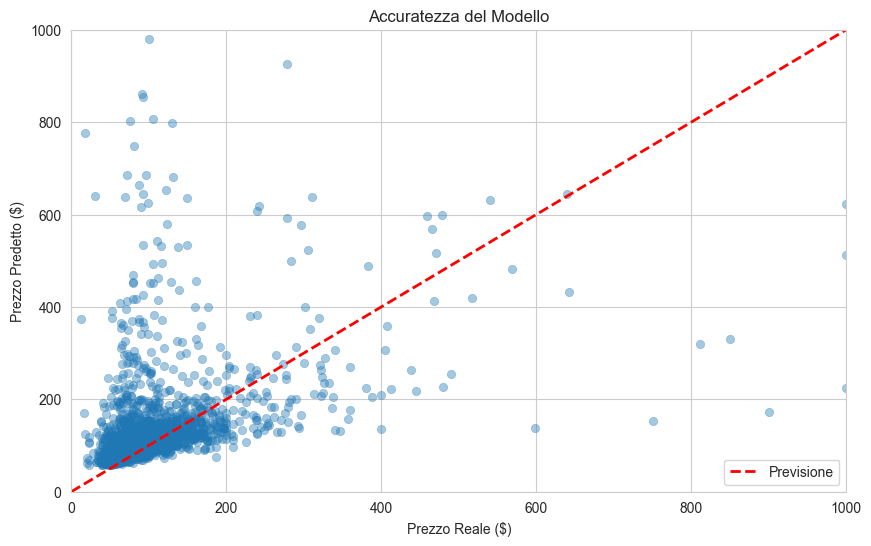

In [ ]:
predictions = model.predict(X_test)
# Calcolo metriche standard
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("-" * 40)
print("REPORT DI VALUTAZIONE")
print("-" * 40)
print(f"R2 Score: {r2:.4f}")
print(f"MAE: ${mae:.2f}")
print(f"RMSE: ${rmse:.2f}")
print("-" * 40)

# Grafico
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.4, edgecolor=None)
plt.plot([0, 1000], [0, 1000], color='red', linestyle='--', linewidth=2, label='Previsione')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.xlabel("Prezzo Reale ($)")
plt.ylabel("Prezzo Predetto ($)")
plt.title("Accuratezza del Modello")
plt.legend()
plt.show()

In [ ]:
# Guardo l'importanza delle feature
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False).head(20))

host_listings_count          0.192268
host_total_listings_count    0.178828
availability_30              0.096022
availability_90              0.085269
availability_60              0.083136
availability_365             0.070509
latitude                     0.066231
minimum_nights_avg_ntm       0.052868
longitude                    0.046713
estimated_revenue_l365d      0.023989
instant_bookable_t           0.022679
review_scores_location       0.012233
beds                         0.009484
maximum_nights_avg_ntm       0.008627
accommodates                 0.006728
room_type_Private room       0.006386
reviews_per_month            0.005522
host_identity_verified_t     0.005387
number_of_reviews            0.004852
review_scores_rating         0.004850
dtype: float64
